Making a function that outputs several linear regressors, each trained on its respective subset of inputted data. The number of regressors is specified by the user, and the inputted data is split into these subsets accordingly.

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
dataDIR = 'short'
DS = xr.open_dataset(dataDIR)

In [3]:
#Temperature:
T = (DS.T.values + DS.T0) * ((DS.P.values + DS.PB.values)/DS.P0)**(DS.R_D/DS.CP)

In [4]:
T.shape #days, height, latitude, longtitude

(240, 52, 36, 72)

In [5]:
albedo = DS.ALBEDO.values

In [6]:
albedo.shape #days, latitude, longtitude

(240, 36, 72)

In [7]:
st = DS.TSK.values

In [8]:
st.shape

(240, 36, 72)

In [9]:
d_c = DS.TAU_OD.values

In [10]:
d_c.shape 

(240, 52, 36, 72)

In [11]:
tsf = DS.TOASW.values #top solar flux

In [12]:
tsf.shape

(240, 36, 72)

In [13]:
albedo = DS.ALBEDO.values

In [14]:
bsf = DS.GSW.values #bottom solar flux, ouput

In [15]:
bsf2 = bsf/(1-albedo)

In [16]:
bsf.shape

(240, 36, 72)

Let's combine the data together for ten time samples, with full latitude and longitude:

In [17]:
e_t = [] #input and output array
#input:
for k in range(10): #10 time snapshots
    for i in range(36):
        for j in range(72):
            input_array = list(T[k,:,i,j]) #start with temp profile
            input_array+=list(d_c[k,:,i,j]) #add dust profile
            input_array.append(st[k,i,j])#add surface temp
            input_array.append(tsf[k,i,j]) #add top solar flux
            input_array.append(bsf2[k,i,j]) #bottom solar flux, with albedo factor
            e_t.append(input_array) #appends data point to overall array

In [18]:
e_t = np.array(e_t)
e_t.shape

(25920, 107)

In [19]:
e_d = pd.DataFrame(e_t) 
e_d = e_d[e_d.iloc[:,105] != 0] #remove 0 flux

In [20]:
e_d

,0,1,2,3,4,5,6,7,8,9,...,97,98,99,100,101,102,103,104,105,106
409,148.284729,148.636597,148.836746,149.054123,149.108185,150.480576,150.495865,150.366959,150.135757,149.954346,...,4.904690e-08,3.354680e-08,2.216521e-08,1.401636e-08,8.328570e-09,4.559754e-09,2.314212e-09,146.435440,2.793927,1.151911
410,148.518845,148.849915,149.019089,149.467178,150.787521,151.900513,151.759918,151.818527,151.691238,151.439484,...,5.034594e-08,3.442808e-08,2.273971e-08,1.437122e-08,8.530136e-09,4.659739e-09,2.353673e-09,146.616074,11.433393,5.232398
411,148.097122,148.320389,148.430603,149.054886,151.791977,152.264450,152.259476,152.425491,152.555023,152.474533,...,5.000184e-08,3.419463e-08,2.258753e-08,1.427722e-08,8.476744e-09,4.633255e-09,2.343221e-09,146.567810,18.633785,9.942341
412,147.897110,148.106903,148.233719,148.889725,152.127869,152.729065,152.735947,152.855118,153.037994,153.033508,...,4.829623e-08,3.303755e-08,2.183323e-08,1.381129e-08,8.212092e-09,4.501976e-09,2.291409e-09,146.327087,24.291586,14.446915
413,148.344757,148.640015,148.834869,149.391769,152.025635,153.853836,153.577179,153.493820,153.389389,153.255142,...,4.648436e-08,3.180837e-08,2.103192e-08,1.331633e-08,7.930954e-09,4.362519e-09,2.236369e-09,146.063110,28.363739,18.059456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25915,215.603439,215.581970,215.501572,215.779877,215.774597,215.704803,215.591812,215.450653,215.274933,215.078506,...,6.489267e-08,4.428884e-08,2.915962e-08,1.832758e-08,1.076697e-08,5.757189e-09,2.772254e-09,215.195969,188.811172,170.473862
25916,215.634720,215.613922,215.533310,215.818542,215.822601,215.758469,215.647919,215.504929,215.321396,215.113815,...,6.490647e-08,4.429820e-08,2.916572e-08,1.833135e-08,1.076911e-08,5.758250e-09,2.772673e-09,215.255035,187.987717,169.630524
25917,215.668396,215.646484,215.563934,215.852631,215.863724,215.803345,215.693527,215.547241,215.355194,215.136658,...,6.491741e-08,4.430562e-08,2.917055e-08,1.833433e-08,1.077080e-08,5.759092e-09,2.773005e-09,215.319656,187.305267,168.930054
25918,215.704468,215.679703,215.593521,215.882095,215.898026,215.839401,215.728546,215.577469,215.376312,215.147232,...,6.492574e-08,4.431127e-08,2.917423e-08,1.833661e-08,1.077210e-08,5.759733e-09,2.773258e-09,215.386261,186.769028,168.377625


This function splits the training data, into n_split groups, according to percentiles of a value located at special index s_index. Then, it trains n_split regressors, each on its respective group, and then outputs these. The ith regressor is trained on the data containing 100(i/n_split) to 100((i+1)/n_split) percentiles of the value located at s_index.

In [21]:
from sklearn.linear_model import LinearRegression


def sat(training_data, n_split, s_index): 
    regressor_list = []
    training_data = np.array(training_data)
    
    for i in range(n_split): #splitting training data
        upper_bound = np.percentile(training_data[:,s_index], (i+1) * 100/n_split)
        lower_bound = np.percentile(training_data[:,s_index], i * 100/n_split)
        i_data = training_data[training_data[:,s_index] < upper_bound]
        i_data = i_data[i_data[:,s_index] >= lower_bound]
        train_in = i_data[:,:106] #training input
        train_out = i_data[:,106] #training output
        lri = LinearRegression() #linear regression i
        lri.fit(train_in,train_out)
        regressor_list.append(lri)
    
    return regressor_list

This function is almost identical to the above, except that it minimizes relative error instead of RMSE, using custom weightings.

In [22]:
from sklearn.linear_model import LinearRegression


def satr(training_data, n_split, s_index): #split and train, relative error version
    regressor_list = []
    training_data = np.array(training_data)
    
    for i in range(n_split): #splitting training data
        upper_bound = np.percentile(training_data[:,s_index], (i+1) * 100/n_split)
        lower_bound = np.percentile(training_data[:,s_index], i * 100/n_split)
        i_data = training_data[training_data[:,s_index] < upper_bound]
        i_data = i_data[i_data[:,s_index] >= lower_bound]
        train_in = i_data[:,:106] #training input
        train_out = i_data[:,106] #training output
        lri = LinearRegression() #linear regression i
        lri.fit(train_in,train_out, sample_weight = 1/train_out**2)
        regressor_list.append(lri)
    
    return regressor_list

This function predicts the output according to the n_split regressors, where the ith regressor is used on the data containing 100(i/n_split) to 100((i+1)/n_split) percentiles of the value located at s_index.

In [23]:
def s_predict(in_data, reg_list, s_index): #predict the output using previously obtained linear regressor list
    in_data = np.array(in_data)
    out_data = []
    for instance in in_data:
        for i in range(len(reg_list)):
            upper_bound = np.percentile(in_data[:,s_index], (i+1) * 100/len(reg_list))
            lower_bound = np.percentile(in_data[:,s_index], i * 100/len(reg_list))
            if instance[s_index] < upper_bound and instance[s_index] >= lower_bound: 
                out_data.append(float(reg_list[i].predict(instance[:106].reshape(1,-1)))) #predicts using a certain regressor
        if(instance[s_index] == np.max(in_data[:,s_index])): #the search right above ignores the absolute maximum element
            out_data.append(float(reg_list[-1].predict(instance[:106].reshape(1,-1)))) #uses lin reg for largest elements
    return np.array(out_data)   

In [24]:
lr_list = sat(e_d, 10, 105) #linear regressor list, let's try 10 regressors
custom_out = s_predict(e_d, lr_list, 105)

In [25]:
rlr_list = satr(e_d, 10, 105) #relative error minimizing linear regressor list
custom_out2 = s_predict(e_d, rlr_list, 105)

In [26]:
total_in = e_d.iloc[:,:106] #total input
total_out = e_d.iloc[:,106] #total output

In [27]:
from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(total_out, custom_out)
lin_rmse = np.sqrt(lin_mse)
print("Error for RMSE minimizing regressors:" + str(lin_rmse)) #great!
lin_rel = mean_squared_error(total_out, custom_out2)
lin_rel = np.sqrt(lin_rel)
print("Error for relative error minimizing regressors:" + str(lin_rel)) #slightly higher but still pretty low

Error for RMSE minimizing regressors:0.5697362992826042
Error for relative error minimizing regressors:0.9758860538978806


Area integration of error:

In [28]:
def int_err(pred, real, real_in, r): 
    areas = []
    for i in range(len(real)):
        dA =  -r**2 * np.sin((np.pi/36)*((real_in.index[i]//72)%36)) * (np.pi/36) * (np.pi/36)  #area increment
        areas.append(dA)
    areas = np.array(areas)
    eps = [] #gets average flux error per time snapshot
    for i in range(9):
        eps.append(np.sum((np.array(pred)[i*1296:(i+1)*1296] - np.array(real)[i*1296:(i+1)*1296])*areas[i*1296:(i+1)*1296]))
    eps.append(np.sum((np.array(pred)[-1296:] - np.array(real)[-1296:])*areas[-1296:]))
    return eps

In [29]:
err1 = int_err(custom_out, total_out, total_in, 3.39e6) #the integral of the error
np.array(err1)/(1.44e14) #divide by surface area of mars, to get norm. error for each of the ten time samples

array([ 1.81876307e-02,  5.25996497e-03,  9.41226393e-05,  5.40411869e-02,
       -2.46148018e-03, -2.26016536e-02, -2.22684666e-02,  3.90291150e-02,
       -1.93493279e-02, -3.06597635e-02])

In [40]:
err2 = int_err(custom_out2, total_out, total_in, 3.39e6) #the integral of the error
np.array(err2)/(1.44e14) #still pretty small! This is in W/m^2 units.

array([0.05444361, 0.04935747, 0.04111535, 0.12270014, 0.0424964 ,
       0.03844699, 0.03067425, 0.12124125, 0.03334573, 0.01392587])

## Plotting data:

In [31]:
all_indices = total_in.index
ti_indices = all_indices[all_indices > 5*36*72] 
ti_indices = ti_indices[ti_indices < 6 *36*72] 
ti_indices #ith time snapshot indices for latitude/longtitude map, currently set to 6th time snapshot

Int64Index([13351, 13352, 13353, 13354, 13355, 13356, 13357, 13358, 13359,
            13360,
            ...
            15542, 15543, 15544, 15545, 15546, 15547, 15548, 15549, 15550,
            15551],
           dtype='int64', length=1320)

In [32]:
total_out = np.array(total_out)
full_out_contour = np.full((36, 72), np.nan)
full_pred_contour = np.full((36, 72), np.nan)
full_pred_contour2 = np.full((36, 72), np.nan)
for index in ti_indices:
    lat_point = index//72 - 36*5
    long_point = index%72 - 1*72
    full_out_contour[lat_point][long_point] = total_out[np.where(all_indices == index)]
    full_pred_contour[lat_point][long_point] = custom_out[np.where(all_indices == index)]
    full_pred_contour2[lat_point][long_point] = custom_out2[np.where(all_indices == index)]

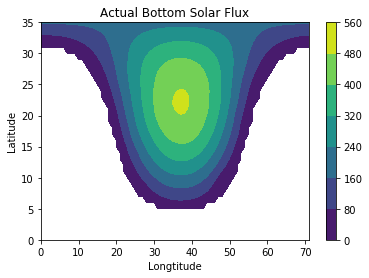

<Figure size 432x288 with 0 Axes>

In [33]:
plt.contourf(full_out_contour)
plt.colorbar()
plt.title("Actual Bottom Solar Flux")
plt.xlabel("Longtitude")
plt.ylabel("Latitude")
plt.show()
plt.savefig("Actual")

### Plots for RMSE minimizing regressors:

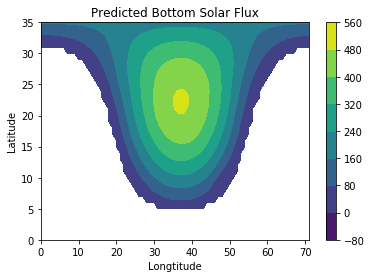

<Figure size 432x288 with 0 Axes>

In [34]:
plt.contourf(full_pred_contour)
plt.colorbar()
plt.title("Predicted Bottom Solar Flux")
plt.xlabel("Longtitude")
plt.ylabel("Latitude")
plt.show()
plt.savefig("Predicted")

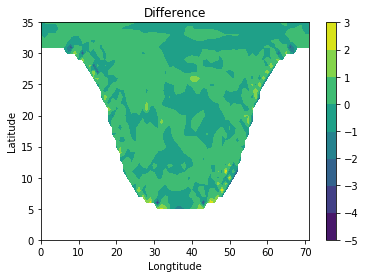

In [35]:
plt.contourf(full_pred_contour - full_out_contour)
plt.colorbar()
plt.title("Difference")
plt.xlabel("Longtitude")
plt.ylabel("Latitude")
plt.show()

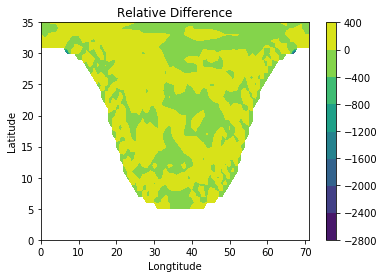

In [36]:
plt.contourf((full_pred_contour - full_out_contour)/full_out_contour)
plt.colorbar()
plt.title("Relative Difference")
plt.xlabel("Longtitude")
plt.ylabel("Latitude")
plt.show() #some massive relative errors at the edge

### Plots for relative error minimizing regressors:

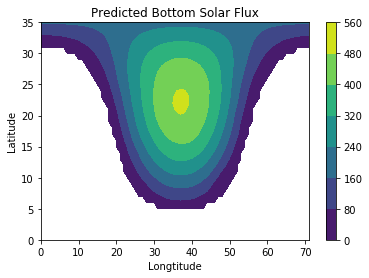

<Figure size 432x288 with 0 Axes>

In [37]:
plt.contourf(full_pred_contour2)
plt.colorbar()
plt.title("Predicted Bottom Solar Flux")
plt.xlabel("Longtitude")
plt.ylabel("Latitude")
plt.show()
plt.savefig("Predicted")

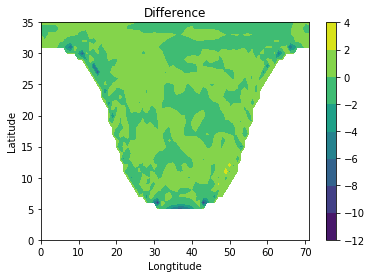

In [38]:
plt.contourf(full_pred_contour2 - full_out_contour)
plt.colorbar()
plt.title("Difference")
plt.xlabel("Longtitude")
plt.ylabel("Latitude")
plt.show()

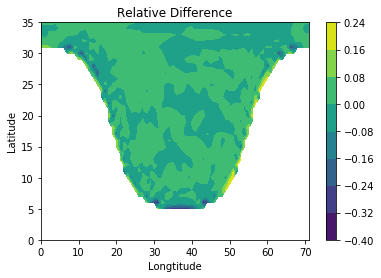

In [39]:
plt.contourf((full_pred_contour2 - full_out_contour)/full_out_contour)
plt.colorbar()
plt.title("Relative Difference")
plt.xlabel("Longtitude")
plt.ylabel("Latitude")
plt.show() #small relative errors, nice